<a href="https://www.kaggle.com/code/aimlrl/multilabel-classification-using-cnns-on-x-rays?scriptVersionId=246069616" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import cv2

In [2]:
single_img = plt.imread("/kaggle/input/data/images_001/images/00000001_001.png")

In [3]:
single_img.shape

(1024, 1024)

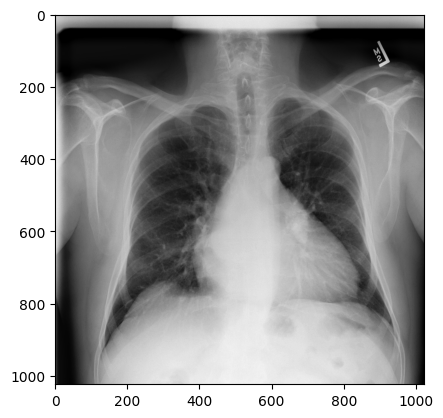

In [4]:
plt.imshow(single_img,cmap="gray")

In [5]:
data = pd.read_csv("/kaggle/input/data/Data_Entry_2017.csv")

In [6]:
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [7]:
all_columns = data.columns

In [8]:
all_columns = list(all_columns)

In [9]:
useful_columns = all_columns[0:2] + all_columns[7:11]

In [10]:
useful_columns

['Image Index',
 'Finding Labels',
 'OriginalImage[Width',
 'Height]',
 'OriginalImagePixelSpacing[x',
 'y]']

In [11]:
useful_data = data[useful_columns]

In [12]:
useful_data

,Image Index,Finding Labels,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,2582,2991,0.143,0.143
...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,2048,2500,0.168,0.168


In [13]:
unique_diseases = set()
for disease in useful_data["Finding Labels"]:
    unique_diseases.update(set(disease.split("|")))

In [14]:
unique_diseases = list(unique_diseases)
unique_diseases.remove("No Finding")

In [15]:
unique_diseases

['Consolidation',
 'Fibrosis',
 'Pleural_Thickening',
 'Effusion',
 'Emphysema',
 'Edema',
 'Atelectasis',
 'Mass',
 'Hernia',
 'Cardiomegaly',
 'Infiltration',
 'Pneumothorax',
 'Pneumonia',
 'Nodule']

In [16]:
diseases2idx = dict(zip(unique_diseases,range(len(unique_diseases))))

In [17]:
diseases2idx

{'Consolidation': 0,
 'Fibrosis': 1,
 'Pleural_Thickening': 2,
 'Effusion': 3,
 'Emphysema': 4,
 'Edema': 5,
 'Atelectasis': 6,
 'Mass': 7,
 'Hernia': 8,
 'Cardiomegaly': 9,
 'Infiltration': 10,
 'Pneumothorax': 11,
 'Pneumonia': 12,
 'Nodule': 13}

In [18]:
another_data = pd.read_csv("/kaggle/input/data/BBox_List_2017.csv")

In [19]:
another_data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


In [20]:
len(another_data["Image Index"].unique())

880

In [21]:
useful_data.set_index(keys="Image Index",drop=False,inplace=True)

In [22]:
useful_data

,Image Index,Finding Labels,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
Image Index,,,,,,
00000001_000.png,00000001_000.png,Cardiomegaly,2682,2749,0.143,0.143
00000001_001.png,00000001_001.png,Cardiomegaly|Emphysema,2894,2729,0.143,0.143
00000001_002.png,00000001_002.png,Cardiomegaly|Effusion,2500,2048,0.168,0.168
00000002_000.png,00000002_000.png,No Finding,2500,2048,0.171,0.171
00000003_000.png,00000003_000.png,Hernia,2582,2991,0.143,0.143
...,...,...,...,...,...,...
00030801_001.png,00030801_001.png,Mass|Pneumonia,2048,2500,0.168,0.168
00030802_000.png,00030802_000.png,No Finding,2048,2500,0.168,0.168
00030803_000.png,00030803_000.png,No Finding,2048,2500,0.168,0.168


In [23]:
useful_data.drop(index=another_data["Image Index"],inplace=True)

/tmp/ipykernel_79/2250962470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data.drop(index=another_data["Image Index"],inplace=True)


In [24]:
useful_data.shape

(111240, 6)

In [25]:
training_data = useful_data.reset_index(drop=True)

In [26]:
testing_data = another_data

In [27]:
training_data

,Image Index,Finding Labels,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,2582,2991,0.143,0.143
...,...,...,...,...,...,...
111235,00030801_001.png,Mass|Pneumonia,2048,2500,0.168,0.168
111236,00030802_000.png,No Finding,2048,2500,0.168,0.168
111237,00030803_000.png,No Finding,2048,2500,0.168,0.168
111238,00030804_000.png,No Finding,2048,2500,0.168,0.168


In [28]:
y_train = list()

for single_img_labels in training_data["Finding Labels"]:

    single_img_multi_hot_vector = np.zeros((len(diseases2idx),))
    diseases = single_img_labels.split("|")

    if "No Finding" not in diseases:
        for single_disease in diseases:

            single_img_multi_hot_vector[diseases2idx[single_disease]] = 1.0

    y_train.append(single_img_multi_hot_vector)

y_train = np.array(y_train)

In [29]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
for absolute_path in pathlib.Path("/kaggle/input/data").glob("*"):

/kaggle/input/data/images_003
/kaggle/input/data/images_012
/kaggle/input/data/LOG_CHESTXRAY.pdf
/kaggle/input/data/README_CHESTXRAY.pdf
/kaggle/input/data/BBox_List_2017.csv
/kaggle/input/data/images_009
/kaggle/input/data/images_008
/kaggle/input/data/images_007
/kaggle/input/data/test_list.txt
/kaggle/input/data/images_010
/kaggle/input/data/ARXIV_V5_CHESTXRAY.pdf
/kaggle/input/data/images_002
/kaggle/input/data/images_011
/kaggle/input/data/Data_Entry_2017.csv
/kaggle/input/data/images_001
/kaggle/input/data/train_val_list.txt
/kaggle/input/data/images_005
/kaggle/input/data/FAQ_CHESTXRAY.pdf
/kaggle/input/data/images_004
/kaggle/input/data/images_006


In [ ]:
training_data["Image Path"] = path_list

In [32]:
def training_data_mini_batches_generator(training_data_df,mb_size=10):

    for i in range(training_data_df.shape[0]//mb_size):

        img_np_array_mb_list = list()

        for j in range(i*mb_size,(i+1)*mb_size):

            single_img_path = training_data["Image Path"].iloc[j]
            img_np_array = plt.imread(single_img_path)

            resized_img_np_array = cv2.resize(img_np_array,(224,224))
            three_channel_np_array = cv2.cvtColor(resized_img_np_array,cv2.COLOR_GRAY2RGB)

            img_np_array_mb_list.append(three_channel_np_array)

        X_train_mb = np.array(img_np_array_mb_list)
        y_train_mb = y_train[i*mb_size:(i+1)*mb_size,:]

        yield X_train_mb, y_train_mb